# Data Science Assignment

## Dataset variables:

- CRIM - per capita crime rate by town

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX - nitric oxides concentration (parts per 10 million)

- RM - average number of rooms per dwelling

- AGE - proportion of owner-occupied units built prior to 1940

- DIS - weighted distances to five Boston employment centres

- RAD - index of accessibility to radial highways

- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town

- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt 

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [2]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Generate the following and explain your findings:
For all visualizations, please include a title in each graph and appropriate labels

1. For the "Median value of owner-occupied homes" provide a boxplot

2. Provide a  histogram for the Charles river variable

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5. Create a histogram for the pupil to teacher ratio variable

### 1. For the "Median value of owner-occupied homes" provide a boxplot

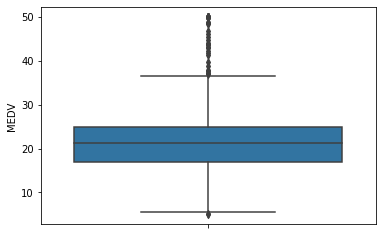

In [3]:
ax = sns.boxplot(y='MEDV', data=boston_df)

### 2. Provide a  histogram for the Charles river variable

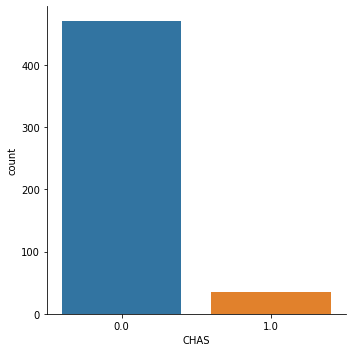

In [4]:
sns.catplot(x='CHAS', kind='count', data=boston_df)

### 3. Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [5]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

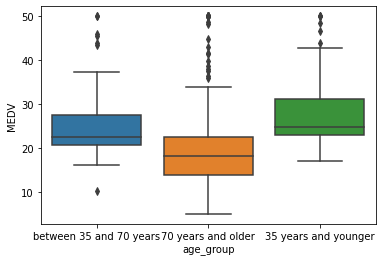

In [6]:
ax = sns.boxplot(x='age_group',y='MEDV', data=boston_df)

### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

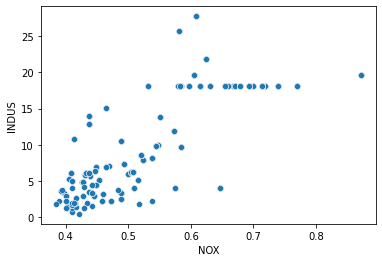

In [7]:
ax = sns.scatterplot(x='NOX',y='INDUS', data=boston_df)

#### There is a positive relationship (correlation) between the two variables!

### 5. Create a histogram for the pupil to teacher ratio variable

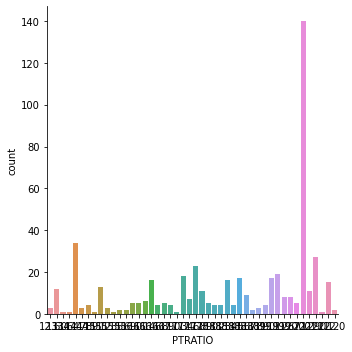

In [8]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)

### Now, for each of the following questions:

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

### 6. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [9]:
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

scipy.stats.ttest_ind(chas1,chas0, equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

##### Since the p-value is less than 0.05 we reject the null hypothesis.

### 7. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [10]:
young_own = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
midlle_own = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
old_own = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [12]:
f_statistic, p_value = scipy.stats.f_oneway(young_own, midlle_own, old_own)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


##### P-value is small and F-test is high; there difference in median values for owner occupied units.

### 8. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209157, 7.913361061233745e-98)

##### Statistics show that there is a correlation between the two variables. 

### 9. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [18]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']

## add an intercept
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

#Statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.21e-08
Time:                        19:40:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Since the p-value is less than 0.05 we reject the null hypothesis, each additional km increase MVAL of about 1.09.